# Examples for Day 3

In [11]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
# %load ml31.py
# MLP Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neural_network import MLPClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42).fit(X_train, y_train)
print(f'Accuracy: {mlp.score(X_test, y_test):.2%}')


Accuracy: 71.35%


In [13]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
Xs_train = scl.fit_transform(X_train)
Xs_test = scl.transform(X_test)

mlp2 = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42).fit(Xs_train, y_train)
print(f'Accuracy: {mlp2.score(Xs_test, y_test):.2%}')

Accuracy: 75.00%


In [16]:
# %load ml32.py
# Hyperparameter tuning with grid search
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split as split, KFold
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = split(X, y, random_state=42)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print(f'Train accuracy without tuning: {model1.score(X_train, y_train):.2%}')
print(f'Test accuracy without tuning: {model1.score(X_test, y_test):.2%}')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = dict(criterion=['gini', 'entropy'], max_leaf_nodes=range(2, 21))
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=kf, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
model2 = DecisionTreeClassifier(**grid.best_params_, random_state=42).fit(X_train, y_train)
print(f'Train accuracy with tuning: {model2.score(X_train, y_train):.2%}')
print(f'Test accuracy with tuning: {model2.score(X_test, y_test):.2%}')

Train accuracy without tuning: 100.00%
Test accuracy without tuning: 70.83%
Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'criterion': 'gini', 'max_leaf_nodes': 7}
Train accuracy with tuning: 79.51%
Test accuracy with tuning: 74.48%


In [18]:
# %load ml33.py
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', SVC())])
pipe.fit(X_train, y_train)
print(f'Accuracy: {pipe.score(X_test, y_test):.2%}')

Accuracy: 73.96%


In [22]:
# Include one more step (feature selection) into the pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

pipe2 = Pipeline([('scaler', MinMaxScaler()), ('feature selection', SelectFromModel(RandomForestClassifier(), threshold='median')), ('clf', SVC())])
pipe2.fit(X_train, y_train)
print(f'Accuracy: {pipe2.score(X_test, y_test):.2%}')

Accuracy: 74.48%


In [23]:
pipe2

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='median')),
                ('clf', SVC())])

In [32]:
from sklearn.model_selection import train_test_split as split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from pandas import read_csv

df = read_csv("data/titanic_processed.csv")
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender_female,Gender_male
0,3,22.0,1,0,7.2500,0,False,True
1,1,38.0,1,0,71.2833,1,True,False
2,3,26.0,0,0,7.9250,1,True,False
3,1,35.0,1,0,53.1000,1,True,False
4,3,35.0,0,0,8.0500,0,False,True


In [25]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.25, random_state=42)

In [33]:
mypipe = Pipeline([('fs', None), ('selector', SelectKBest()),  ('clf', KNeighborsClassifier())])

params1 = {}
params1['fs'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
params1['selector__k'] = range(1, 9)
params1['clf'] = [KNeighborsClassifier()]
params1['clf__n_neighbors'] = range(3, 10, 2)
params1['clf__weights'] = ['uniform', 'distance']

params2 = {}
params2['fs'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
params2['selector__k'] = range(1, 9)
params2['clf'] = [DecisionTreeClassifier()]
params2['clf__criterion'] = ['gini', 'entropy']
params2['clf__max_leaf_nodes'] = range(2, 21)

params = [params1, params2]

gs = GridSearchCV(mypipe, params, cv=5, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 1472 candidates, totalling 7360 fits
{'clf': KNeighborsClassifier(), 'clf__n_neighbors': 9, 'clf__weights': 'uniform', 'fs': StandardScaler(), 'selector__k': 7}


In [34]:
best_pipe = gs.best_estimator_
best_pipe.fit(X_train, y_train)

print(f"Best pipe accuracy: {best_pipe.score(X_test, y_test):.3%}")

Best pipe accuracy: 78.924%


In [35]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f"knn accuracy: {knn.score(X_test, y_test):.3%}")

knn accuracy: 67.265%


In [36]:
best_pipe

Pipeline(steps=[('fs', StandardScaler()), ('selector', SelectKBest(k=7)),
                ('clf', KNeighborsClassifier(n_neighbors=9))])

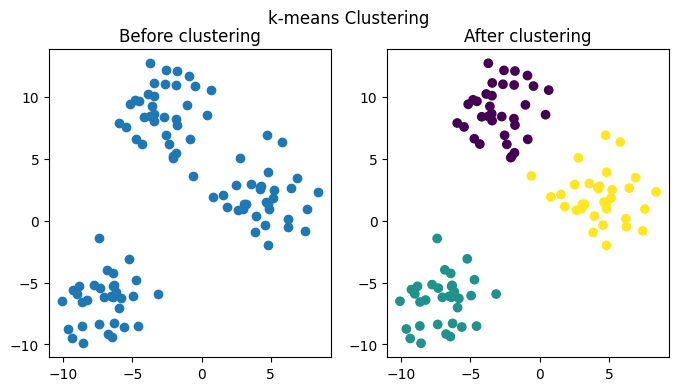

In [38]:
# %load ml34.py
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
km = KMeans(n_clusters=3, n_init=10).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('k-means Clustering')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=km.labels_)
ax2.set_title('After clustering')
plt.show()


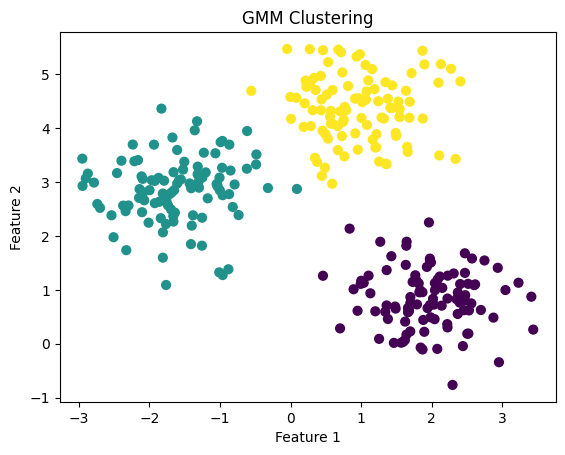

In [40]:
# %load ml35.py
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Fit a Gaussian Mixture Model and predict the cluster for each data point
labels = GaussianMixture(n_components=3).fit_predict(X)
# Plot the data points and cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [41]:
# Clustering of non-spherical clusters
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = read_csv("data/long_clusters.csv")
X.head()

,Feature 0,Feature 1
0,-2.813086,2.569348
1,-2.231062,2.102220
2,-2.679970,-0.161424
3,-2.764727,3.112637
4,-3.580235,3.893048


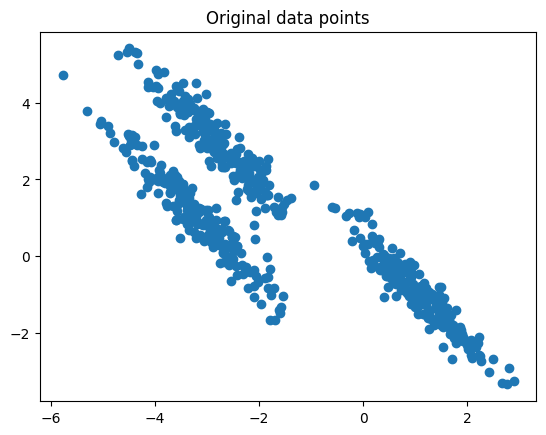

In [42]:
# Plot the data points
plt.scatter(X["Feature 0"], X["Feature 1"])
plt.title("Original data points")
plt.show()

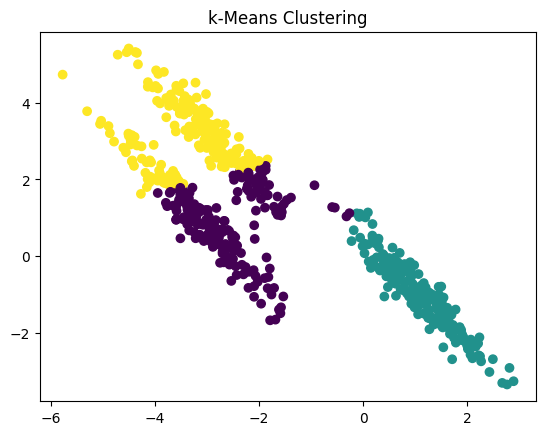

In [44]:
# Use k-means clustering
km = KMeans(n_clusters=3, n_init=10).fit(X)

plt.scatter(X["Feature 0"], X["Feature 1"], c=km.labels_)
plt.title("k-Means Clustering")
plt.show()

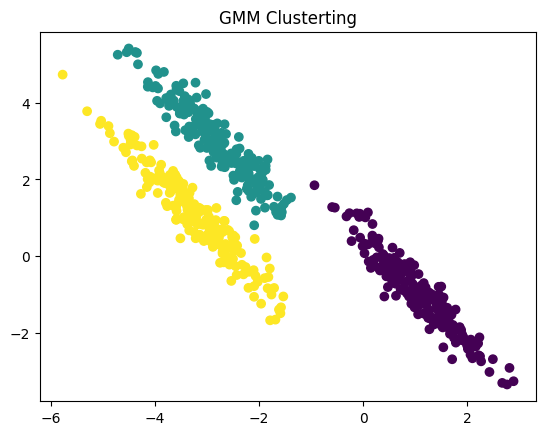

In [45]:
# Use Gaussina Mixture Model
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

plt.scatter(X["Feature 0"], X["Feature 1"], c=labels)
plt.title("GMM Clusterting")
plt.show()

In [49]:
# %load ml36.py
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

pca = PCA(n_components=24)
X_reduced = pca.fit_transform(X)

print(X.shape, X_reduced.shape)
print(pca.explained_variance_ratio_.sum())


(1797, 64) (1797, 24)
0.9260737010079612


In [50]:
# Train a knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

X1_train, X1_test, y1_train, y1_test = split(X, y, random_state=42)
knn1 = KNeighborsClassifier().fit(X1_train, y1_train)
print(f"knn1 accuracy: {knn1.score(X1_test, y1_test):.3%}")

knn1 accuracy: 99.333%


In [51]:
X2_train, X2_test, y2_train, y2_test = split(X_reduced, y, random_state=42)
knn2 = KNeighborsClassifier().fit(X2_train, y2_train)
print(f"knn2 accuracy: {knn2.score(X2_test, y2_test):.3%}")

knn2 accuracy: 99.333%


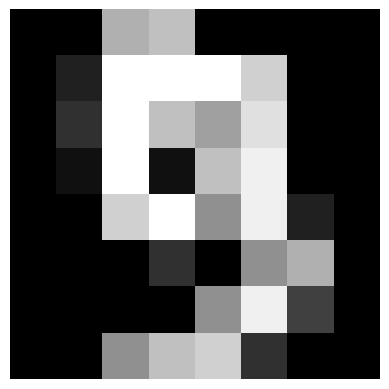

In [54]:
digit = X[9].reshape(8, 8)

plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.show()